In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


In [5]:
pd.read_csv("submission.csv") 
df

,id,sales
0,3000888,3.056196
1,3000889,1.445302
2,3000890,13.310976
3,3000891,2216.884255
4,3000892,1.445302
...,...,...
28507,3029395,447.752389
28508,3029396,136.339060
28509,3029397,1984.648576
28510,3029398,147.236049


In [7]:
df.fillna(df.median(numeric_only=True), inplace=True)
df

,id,sales
0,3000888,3.056196
1,3000889,1.445302
2,3000890,13.310976
3,3000891,2216.884255
4,3000892,1.445302
...,...,...
28507,3029395,447.752389
28508,3029396,136.339060
28509,3029397,1984.648576
28510,3029398,147.236049


In [9]:
X = df.drop(columns=['sales']) 
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

stacking_model = StackingRegressor(
    estimators=[('RandomForest', rf), ('XGBoost', xgb)],
    final_estimator=LinearRegression()
)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_stack = stacking_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_stack = mean_squared_error(y_test, y_pred_stack)

results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "Stacking Model"],
    "MSE": [mse_rf, mse_xgb, mse_stack]
})

print("\nModel Performance Comparison:")
print(results)


Model Performance Comparison:
            Model           MSE
0   Random Forest  1.873185e+06
1         XGBoost  1.176927e+06
2  Stacking Model  1.149991e+06


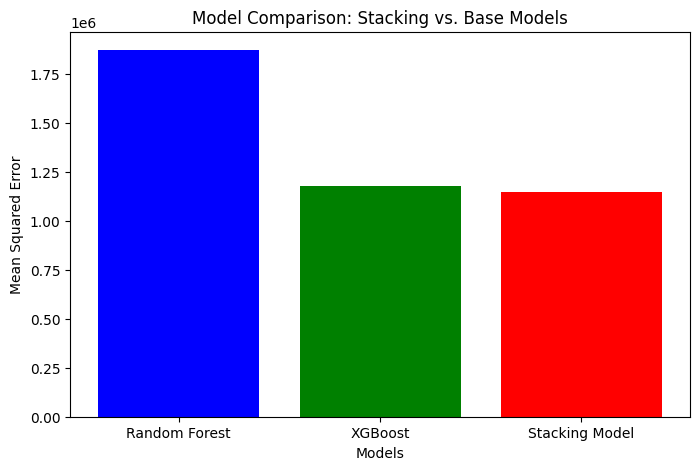

In [11]:
plt.figure(figsize=(8, 5))
plt.bar(results["Model"], results["MSE"], color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Model Comparison: Stacking vs. Base Models")
plt.show()